Define a population probability distribution by combining multiple pyhon's continuous distribution functions.  
Show its theoretical average.  
Generate a sample set with a sample size of your choice.  
Calculate sample average.  
Repeat generating resampling sets and calculate their sample average.  
Caclulate the average of averages of the resampled sets.  
Compare the average of averages and the original sample set's average with the theoretical average.  
 
Repeat the above procedure multiple times.

In [1]:
## ライブラリのインポート
import numpy as np
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## matplotの設定
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### 自作の確率分布
**正規分布**  
平均:100 分散:50  

**一様分布**  
平均:150 区間:\[150, 250) (分散:833.33)

この２つの分布を  
$前者:後者=0.7:0.3$  
の割合で混成した確率分布を、今回の対象とする。

In [3]:
## combined pdfの作成
#### 正規分布と一様分布の生成
x = np.linspace(-100, 300, num=800)
nd = norm.pdf(x=x, loc=100, scale=50)
ud = uniform.pdf(x=x, loc=150, scale=100)

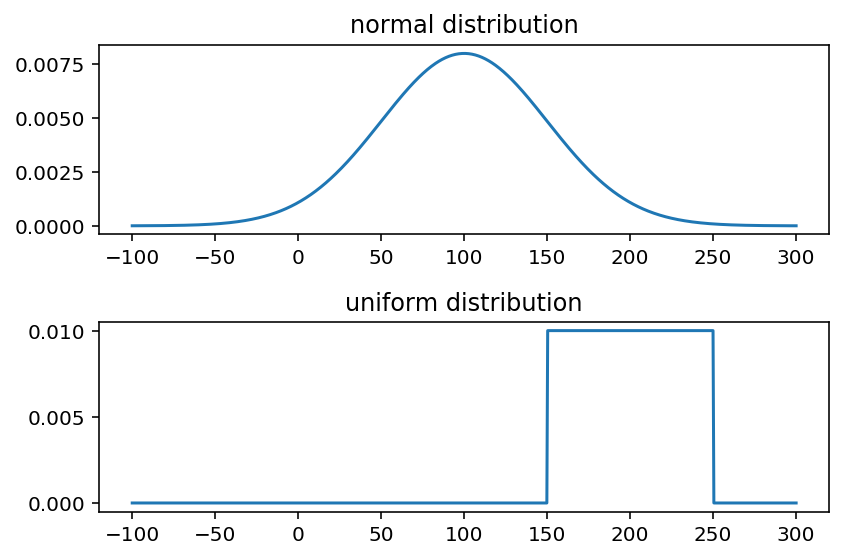

In [4]:
## 生成した正規分布
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(x, nd)
ax2.plot(x, ud)

ax1.set_title("normal distribution")
ax2.set_title("uniform distribution")

fig.tight_layout()

In [5]:
## 混成の割合
nd_rate = 0.7
ud_rate = 0.3

In [6]:
## 混成した確率分布の作成
comb_distr = nd_rate*nd + ud_rate*ud

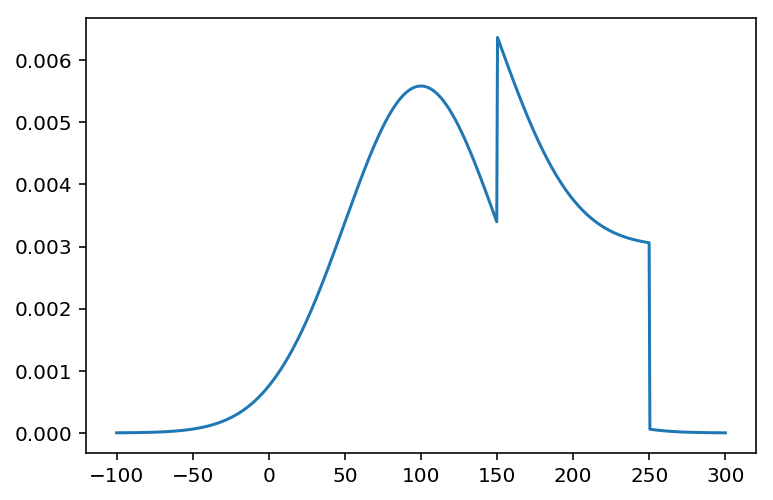

In [7]:
## 作成した確率分布
plt.figure()
plt.plot(x, comb_distr)
plt.show()

In [8]:
## 平均の理論値
theoretical_average = nd_rate*100 + ud_rate*200
print(theoretical_average)

130.0


#### 試行条件
サンプル数を100, 試行回数を1000とする。

In [9]:
n = 100
repeat = 1000

In [10]:
## 70%の確率で正規分布(平均100, 分散50)から、30%の確率で一様分布(平均150, 区間[150,250))から、sizeの数だけサンプリングする関数
def random_datagen(size):
    rand_samples = np.asarray(
        [np.random.normal(loc=100, scale=50, size=1) \
         if i < 0.7 else np.random.uniform(low=150, high=250, size=1) \
         for i in np.random.uniform(size=size)]
    ).reshape(size)
    return(rand_samples)

## 一回の試行で得られた平均を格納するリスト(平均の実験値)
averages_list = []
## 累積平均
cum_ave = []

## 1000回実行
for i in range(repeat):
    rand_samples = random_datagen(n)
    averages_list.append(np.average(rand_samples))
    cum_ave.append(np.average(averages_list))

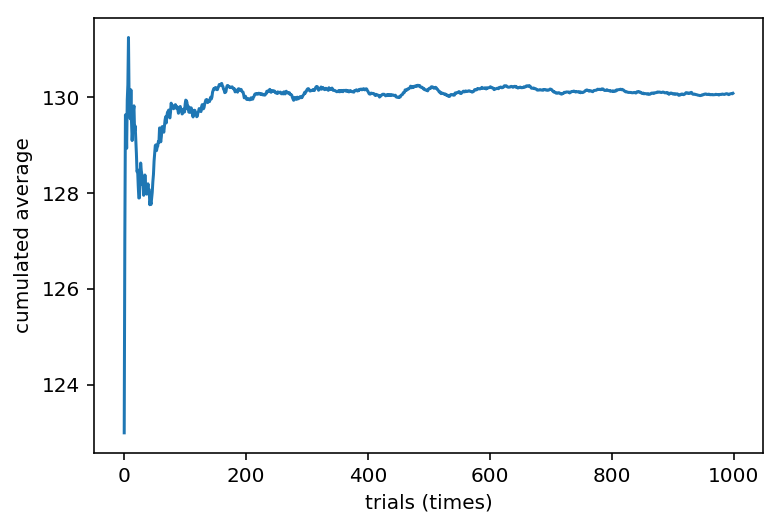

In [11]:
### 累積平均の移行
plt.figure()
plt.plot(cum_ave)
plt.xlabel("trials (times)")
plt.ylabel("cumulated average")
plt.show()

In [12]:
cum_ave[-1]

130.07463818962069

/Users/suzukikensho/Desktop/python_virtual/statistics/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


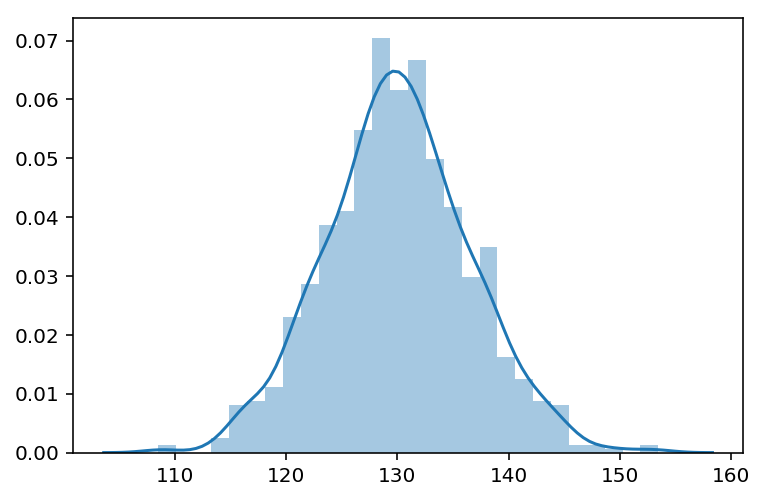

In [13]:
### 平均の実験値の分布
sns.distplot(averages_list)

#### おまけ ---- **中心極限定理** ----


**$平均=\mu, 分散=\sigma^2$に従う母集団が正規分布であろうとなかろうと、その母集団からの標本(サンプル数=n)は、**  
**nが十分に大きくなるにつれて、標本平均の分布は$平均=\mu, 分散=\frac{\sigma^2}{n}$の正規分布$N(\mu,\frac{\sigma^2}{n})$に近づく。**

今回は、サンプルサイズが100とある程度大きいため、以下のような分布になっている。  
(基本的にはサンプル数が1000あると、正規分布とほぼ同じ形になるが、場合によっては100でも十分らしいです。)

そこで、一回のサンプル数を増やしてみると、、

In [18]:
n = 3000
repeat = 1000

averages_list = []
cum_ave = []

for i in range(repeat):
    rand_samples = random_datagen(n)
    averages_list.append(np.average(rand_samples))
    cum_ave.append(np.average(averages_list))

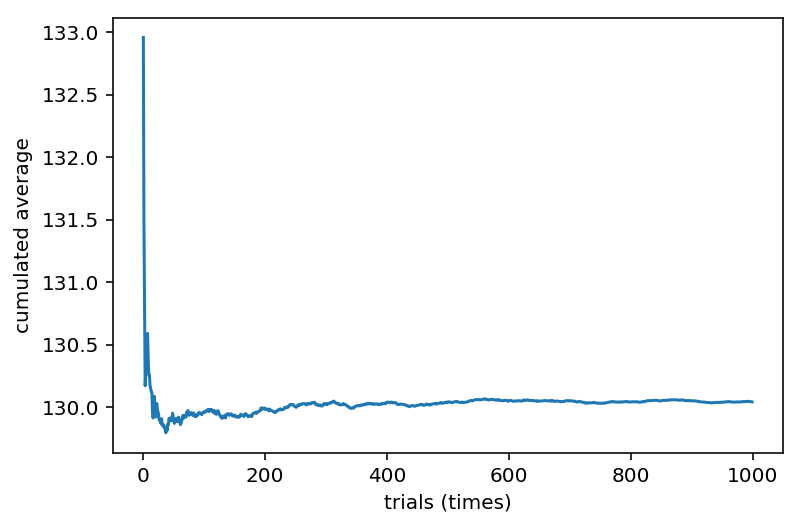

In [19]:
plt.figure()
plt.plot(cum_ave)
plt.xlabel("trials (times)")
plt.ylabel("cumulated average")
plt.show()

In [20]:
cum_ave[-1]

130.0422071220387

少し収束が早くなっていることがわかる。また、

/Users/suzukikensho/Desktop/python_virtual/statistics/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


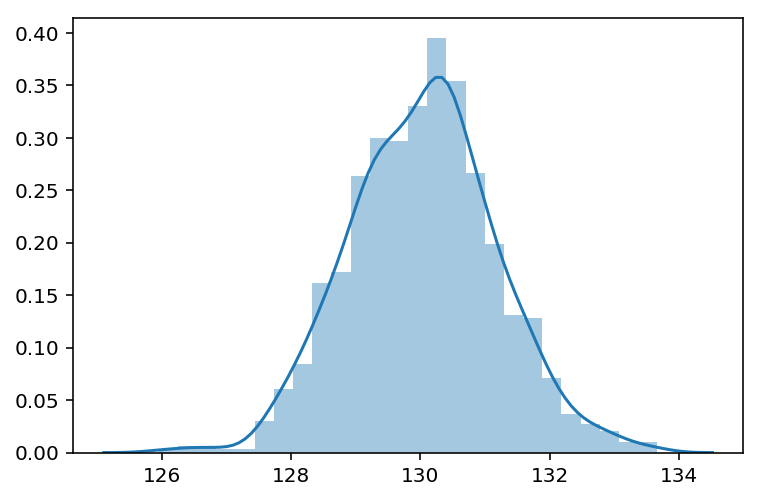

In [21]:
sns.distplot(averages_list)

平均実験値の分布が、より正規分布に近づいているはずである。。(サンプル数が少ない時に上手く行きすぎてしまった模様)